# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import contextily as cx
import numpy as np

# Load data

## Comparison between Booser500 map and Syndicat des mobilités data

In [7]:
# Booser 500
gdf = gpd.read_file('raw/flux_routiers_2022_de_tours_et_de_son_aire_d_attraction.geojson').dropna(subset = ['geometry', 'TMJO_2022'])

In [8]:
# Syndicat des mobilités
gdf2 = gpd.read_file(
    'raw/flux_2022_mobilité_touraine/Base2022_2sensconfondus.shp'
).dropna(subset = ['geometry', 'TMJO_2022'])

In [9]:
gdf.columns

Index(['id', 'ID_BDTOPO', 'NbS_TMJO22', 'TMJO_2022', 'code', '_umap_options',
       'nom', 'geometry'],
      dtype='object')

In [11]:
# Additional years AAWT here + Trucks
gdf2.columns

Index(['id', 'ID_BDTOPO', 'NbS_TMJO22', 'TMJO_2022', 'NbS_TMJO21', 'TMJO_2021',
       'NbS_TMJO20', 'TMJO_2020', 'NbS_TMJO19', 'TMJO_2019', 'NbS_PL22',
       'TMJO_PL22', 'NbS_PL21', 'TMJO_PL21', 'NbS_PL20', 'TMJO_PL20',
       'NbS_PL19', 'TMJO_PL19', 'NbS_HPM_22', 'HPM_2022', 'NbS_HPM_21',
       'HPM_2021', 'NbS_HPM_20', 'HPM_2020', 'NbS_HPM_19', 'HPM_2019',
       'NbS_HPS_22', 'HPS_2022', 'NbS_HPS_21', 'HPS_2021', 'NbS_HPS_20',
       'HPS_2020', 'NbS_HPS_19', 'HPS_2019', 'ZOOM', 'X', 'Y', 'Z',
       'geometry'],
      dtype='object')

In [4]:
gdf.shape[0] == gdf2.shape[0]
# Same number of sensors ?

True

In [5]:
jf = gdf.set_index('id').join(gdf2.set_index('id'),
                         rsuffix = 'r'
                         )[['TMJO_2022', 'TMJO_2022r']]
print(jf.shape[0])
print((jf['TMJO_2022'] == jf['TMJO_2022r']).sum())
# These are the same values ?

226
226


In [6]:
jf, gdf, gdf2 = None, None, None

## Load data

In [12]:
gdf = gpd.read_file(
    'raw/flux_2022_mobilité_touraine/Base2022_2sensconfondus.shp'
)

In [13]:
# 2 sens confondu --> raw_oneway = False
gdf['raw_oneway'] = False

In [16]:
gdf.dropna(subset = [f'TMJO_{x}' for x in range(2019,2023)], how='all', inplace=True)

In [18]:
gdf.dropna(subset = ['geometry'], inplace=True)

In [31]:
k.geom_type

'MultiLineString'

In [32]:
# We have Z coordinate: let's remove it:
from shapely.geometry import LineString
from tqdm import tqdm

geometries = list()

for k in tqdm(gdf.geometry) :
    # List of coordinates of the first geometry
    if k.geom_type != 'MultiLineString' :
        l = list(k.coords)
    else : 
        l = list(k.geoms[0].coords)
    # We should remove the last coordinate of each point
    geometries.append(LineString([x[:-1] for x in l]))
    
gdf['geometry'] = geometries

100%|██████████| 423/423 [00:00<00:00, 26416.58it/s]


In [33]:
gdf.geometry.unique().size

423

In [42]:
gdf.to_crs('EPSG:4326', inplace=True)

(-0.0006866455078125, 1.4050981581755357, 46.8005503990642, 47.7545596189261)

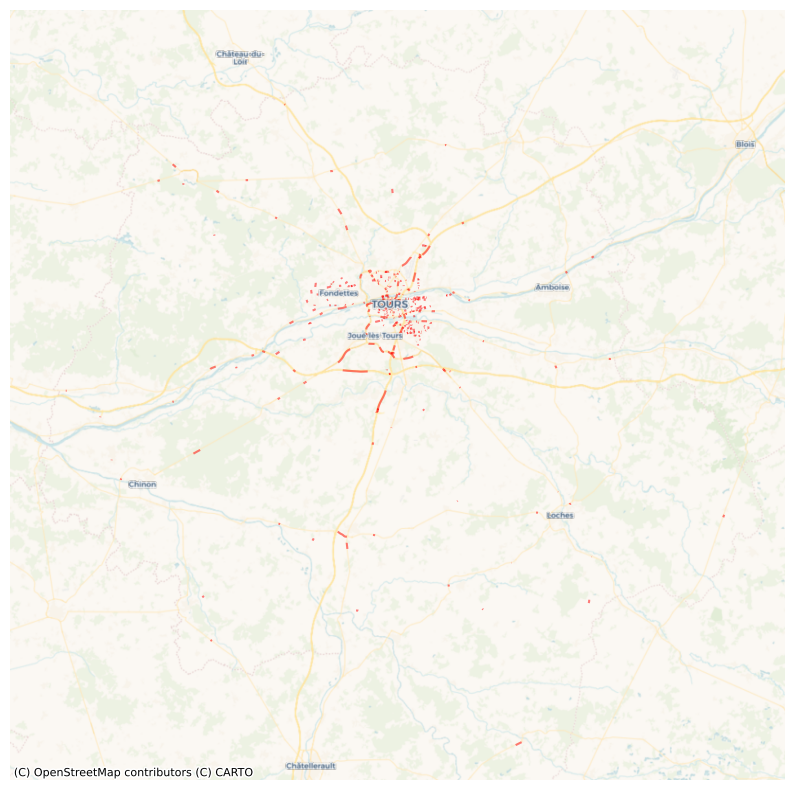

In [43]:
# Plot sensors
ax = gdf.plot(color = 'r', markersize = 20, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')
plt.axis('auto')

# Map Matching with OSM

In [37]:
import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import lines_matching

In [45]:
gdf = lines_matching(gdf)

Main graph loaded
Node 975941891 not reachable from 978038702
Node 1814585128 not reachable from 978038702
Node 1814585128 not reachable from 975941891
Node 17874487 not reachable from 584376032
Node 1083060338 not reachable from 1235803945
Node 17874487 not reachable from 1235803945
Node 1749045116 not reachable from 1083060338
Node 1706509751 not reachable from 1286522991
Node 1181058229 not reachable from 1286522991
Node 198545182 not reachable from 1286522991
Node 974875612 not reachable from 1706509751
Node 1203480620 not reachable from 1706509751
Node 1203480620 not reachable from 1706509751
Node 975935913 not reachable from 1706509751
Node 974875612 not reachable from 1181058229
Node 1203480620 not reachable from 1181058229
Node 1203480620 not reachable from 1181058229
Node 975935913 not reachable from 1181058229
Node 1236379285 not reachable from 974875612
Node 1157474458 not reachable from 974875612
Node 1203480620 not reachable from 974875612
Node 1077389657 not reachable fro

In [64]:
gdf[~gdf[ 
       'TMJO_PL22'].isna()][[ 'TMJO_2019', 'NbS_PL22',
       'TMJO_PL22', 'NbS_PL21']]

,TMJO_2019,NbS_PL22,TMJO_PL22,NbS_PL21
38,10479.0,2.0,664.0,2.0
39,1148.0,2.0,66.0,2.0
52,5539.0,2.0,229.0,2.0
60,NaN,1.0,391.0,1.0
61,NaN,1.0,372.0,1.0
...,...,...,...,...
707,45000.0,2.0,11319.0,2.0
709,13381.0,2.0,425.0,2.0
733,18368.0,2.0,285.0,2.0
739,18383.0,2.0,767.0,NaN


In [66]:
gdf.columns

Index(['id', 'ID_BDTOPO', 'NbS_TMJO22', 'TMJO_2022', 'NbS_TMJO21', 'TMJO_2021',
       'NbS_TMJO20', 'TMJO_2020', 'NbS_TMJO19', 'TMJO_2019', 'NbS_PL22',
       'TMJO_PL22', 'NbS_PL21', 'TMJO_PL21', 'NbS_PL20', 'TMJO_PL20',
       'NbS_PL19', 'TMJO_PL19', 'NbS_HPM_22', 'HPM_2022', 'NbS_HPM_21',
       'HPM_2021', 'NbS_HPM_20', 'HPM_2020', 'NbS_HPM_19', 'HPM_2019',
       'NbS_HPS_22', 'HPS_2022', 'NbS_HPS_21', 'HPS_2021', 'NbS_HPS_20',
       'HPS_2020', 'NbS_HPS_19', 'HPS_2019', 'ZOOM', 'X', 'Y', 'Z', 'geometry',
       'raw_oneway', 'osm_name', 'osm_type', 'osm_lanes', 'osm_oneway',
       'osm_maxspeed', 'osmid'],
      dtype='object')

# Final saving

In [48]:
from validate_dataset import validate_dataset

In [69]:
for year in range(2019, 2023):
    sub = gdf.rename(columns = {f'TMJO_{year}':'AAWT',
                      f'TMJO_PL{str(year)[-2:]}':'TR_AAWT',
                      })[[
    'AAWT',
    'TR_AAWT',
    'raw_oneway',
    'osm_name',
    'osm_type',
    'osm_lanes',
    'osm_oneway',
    'osm_maxspeed',
    'osmid',
    'geometry'
]]
    sub = validate_dataset(sub)
    # Save
    sub.to_file(f'treated/Tours_AAWT_{year}.geojson', index = False)

Number of NaN values for AAWT: 148
Number of NaN values for geometry: 0
Number of low outliers for AAWT: 0
Number of high outliers for AAWT: 0
Number of NaN values for AAWT: 142
Number of NaN values for geometry: 0
Number of low outliers for AAWT: 0
Number of high outliers for AAWT: 0
Number of NaN values for AAWT: 180
Number of NaN values for geometry: 0
Number of low outliers for AAWT: 1
Number of high outliers for AAWT: 0
Number of NaN values for AAWT: 197
Number of NaN values for geometry: 0
Number of low outliers for AAWT: 0
Number of high outliers for AAWT: 0
